In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')  # Update with your dataset path


In [5]:
# Encode categorical features (if any)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['PacketRaw'])  # Drop 'PacketRaw' from features
y = df['PacketRaw']

# Apply condition to categorize PacketRaw
y = y.apply(lambda x: 0 if x < 100 else 1)  # 0: Normal, 1: Attack


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Manually selecting features
selected_features = ['Type', 'Node', 'FaceId', 'FaceDescr', 'Kilobytes', 'KilobytesRaw']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [8]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Check the class distribution after SMOTE
print(f"Class distribution after applying SMOTE:\n{y_train_resampled.value_counts()}")


Class distribution after applying SMOTE:
PacketRaw
0    7686
1    7686
Name: count, dtype: int64


In [9]:
# Cross-validation for RandomForest
rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (RandomForest):", scores)
print("Mean cross-validated accuracy (RandomForest):", scores.mean())

# Cross-validation for KNN
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (KNN):", scores_knn)
print("Mean cross-validated accuracy (KNN):", scores_knn.mean())

# Cross-validation for SVM
svm = SVC()
scores_svm = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (SVM):", scores_svm)
print("Mean cross-validated accuracy (SVM):", scores_svm.mean())


Cross-validated scores (RandomForest): [0.9395122  0.93691057 0.93461288 0.92485361 0.94404684]
Mean cross-validated accuracy (RandomForest): 0.9359872203796857
Cross-validated scores (KNN): [0.92065041 0.97821138 0.99024073 0.98471047 0.98438517]
Mean cross-validated accuracy (KNN): 0.9716396316337921
Cross-validated scores (SVM): [0.86081301 0.86406504 0.86662329 0.8454782  0.86271958]
Mean cross-validated accuracy (SVM): 0.8599398257613025


In [10]:
# Function to evaluate models
def evaluate_model(clf, X_train, y_train, X_test, y_test, trial_name, clf_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{clf_name} - {trial_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    return accuracy, cm, report

# RandomForest Trials
for trial in range(1, 4):
    evaluate_model(RandomForestClassifier(max_depth=5, n_estimators=10, random_state=trial),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Types", "RandomForest")

# KNN Trials
for trial in range(1, 4):
    evaluate_model(KNeighborsClassifier(),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Types", "KNN")

# SVM Trials
for trial in range(1, 4):
    evaluate_model(SVC(random_state=trial),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Types", "SVM")



RandomForest - Trial 1: Node 3 + All Types
Accuracy: 0.9721
Confusion Matrix:
[[3255   56]
 [  50  435]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3311
           1       0.89      0.90      0.89       485

    accuracy                           0.97      3796
   macro avg       0.94      0.94      0.94      3796
weighted avg       0.97      0.97      0.97      3796


RandomForest - Trial 2: Node 3 + All Types
Accuracy: 0.9613
Confusion Matrix:
[[3200  111]
 [  36  449]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3311
           1       0.80      0.93      0.86       485

    accuracy                           0.96      3796
   macro avg       0.90      0.95      0.92      3796
weighted avg       0.96      0.96      0.96      3796


RandomForest - Trial 3: Node 3 + All Types
Accuracy: 0.9700
Confusion Matrix:
[[3259   

###############################################################################################################################################

Trial 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')

# Filter for Node 3 and Type 'InInterests'
df_trial2 = df[(df['Node'] == 3) & (df['Type'] == 'InInterests')]

# Prepare features and target
X_trial2 = df_trial2.drop(columns=['PacketRaw'])
y_trial2 = df_trial2['PacketRaw'].apply(lambda x: 0 if x < 100 else 1)

# Encode categorical features
for col in X_trial2.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_trial2[col] = le.fit_transform(X_trial2[col])

# Introduce Label Smoothing
label_smoothing_rate = 0.05
y_trial2 = y_trial2.apply(lambda x: np.random.choice([x, 1 - x], p=[1 - label_smoothing_rate, label_smoothing_rate]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_trial2, y_trial2, test_size=0.3, random_state=42)

# Apply SMOTE
smote = SMOTE(k_neighbors=5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Pipelines
models = {
    'RandomForest': RandomForestClassifier(random_state=42, max_depth=5, n_estimators=10),
    'SVM': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Evaluate the models with Cross-Validation
for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)
    print(f"Cross-validated scores ({name}): {scores}")
    print(f"Mean cross-validated accuracy ({name}): {scores.mean()}")

# Train and test the models
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{name} - Node 3 + Type 'InInterests'")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)


Cross-validated scores (RandomForest): [0.90658499 0.91883614 0.90644172 0.91257669 0.9095092 ]
Mean cross-validated accuracy (RandomForest): 0.9107897481186408
Cross-validated scores (SVM): [0.90658499 0.91883614 0.90490798 0.91257669 0.9095092 ]
Mean cross-validated accuracy (SVM): 0.9104829996523831
Cross-validated scores (KNN): [0.64471669 0.91883614 0.90490798 0.91257669 0.9095092 ]
Mean cross-validated accuracy (KNN): 0.8581093396217552

RandomForest - Node 3 + Type 'InInterests'
Accuracy: 0.9489
Confusion Matrix:
[[678   7]
 [ 39 176]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       685
           1       0.96      0.82      0.88       215

    accuracy                           0.95       900
   macro avg       0.95      0.90      0.93       900
weighted avg       0.95      0.95      0.95       900


SVM - Node 3 + Type 'InInterests'
Accuracy: 0.9489
Confusion Matrix:
[[678   7]
 [ 39 176]]
Classifi

###############################################################################################################################################

Trial 3

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')  # Update with your dataset path

# Encode categorical features (if any)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Map the original type labels to their encoded values
original_types = ['InInterests', 'OutInterests', 'InData', 'OutData', 'InSatisfiedInterests', 'OutSatisfiedInterests']
trial_3_types = label_encoders['Type'].transform(original_types)

# Separate features and target
X = df.drop(columns=['PacketRaw'])  # Drop 'PacketRaw' from features
y = df['PacketRaw']

# Apply condition to categorize PacketRaw
y = y.apply(lambda x: 0 if x < 100 else 1)  # 0: Normal, 1: Attack

# Filter for Trial 3 specific types
X = X[X['Type'].isin(trial_3_types)]
y = y[X.index]  # Align y with the filtered X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manually selecting features
selected_features = ['Type', 'Node', 'FaceId', 'FaceDescr', 'Kilobytes', 'KilobytesRaw']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Cross-validation for RandomForest
rf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42)
scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (RandomForest):", scores)
print("Mean cross-validated accuracy (RandomForest):", scores.mean())

# Cross-validation for KNN
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (KNN):", scores_knn)
print("Mean cross-validated accuracy (KNN):", scores_knn.mean())

# Cross-validation for SVM
svm = SVC()
scores_svm = cross_val_score(svm, X_train_resampled, y_train_resampled, cv=5)
print("Cross-validated scores (SVM):", scores_svm)
print("Mean cross-validated accuracy (SVM):", scores_svm.mean())

# Function to evaluate models
def evaluate_model(clf, X_train, y_train, X_test, y_test, trial_name, clf_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\n{clf_name} - {trial_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    return accuracy, cm, report

# RandomForest Trials
for trial in range(1, 3):
    evaluate_model(RandomForestClassifier(max_depth=5, n_estimators=10, random_state=trial),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Relevant Types", "RandomForest")

# KNN Trials
for trial in range(1, 3):
    evaluate_model(KNeighborsClassifier(),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Relevant Types", "KNN")

# SVM Trials
for trial in range(1, 3):
    evaluate_model(SVC(random_state=trial),
                   X_train_resampled, y_train_resampled, X_test_selected, y_test,
                   f"Trial {trial}: Node 3 + All Relevant Types", "SVM")


Cross-validated scores (RandomForest): [0.97182377 0.96668375 0.94361866 0.97283444 0.96770887]
Mean cross-validated accuracy (RandomForest): 0.9645338981270639
Cross-validated scores (KNN): [0.96977459 0.99538698 0.99846233 0.99692465 0.99846233]
Mean cross-validated accuracy (KNN): 0.9918021758492912
Cross-validated scores (SVM): [0.89497951 0.89082522 0.89082522 0.89338801 0.89902614]
Mean cross-validated accuracy (SVM): 0.8938088180924453

RandomForest - Trial 1: Node 3 + All Relevant Types
Accuracy: 0.9273
Confusion Matrix:
[[1878  184]
 [   0  470]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2062
           1       0.72      1.00      0.84       470

    accuracy                           0.93      2532
   macro avg       0.86      0.96      0.89      2532
weighted avg       0.95      0.93      0.93      2532


RandomForest - Trial 2: Node 3 + All Relevant Types
Accuracy: 0.9439
Confusion Matrix:


##############################################################################################################################################

Plot the Accuracy of Each Model

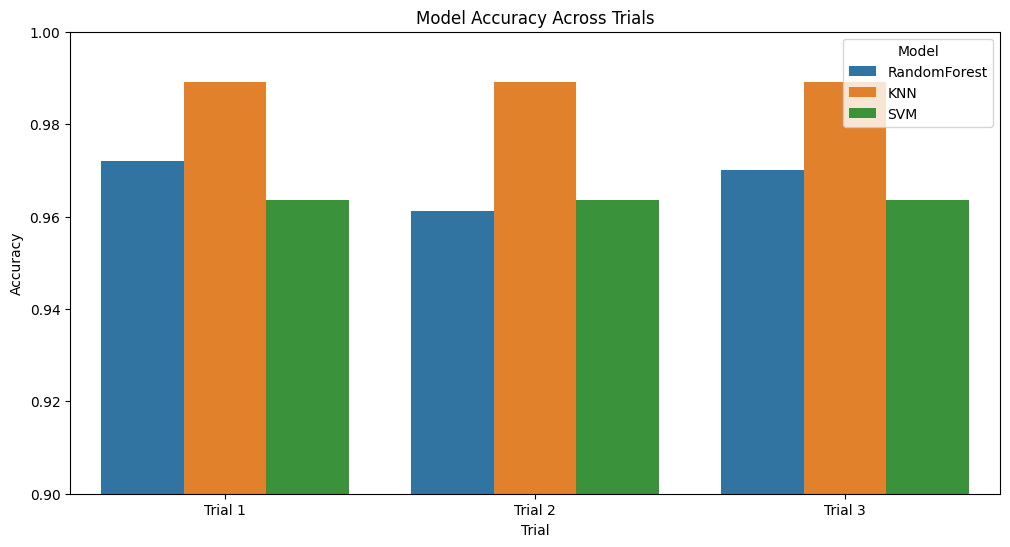

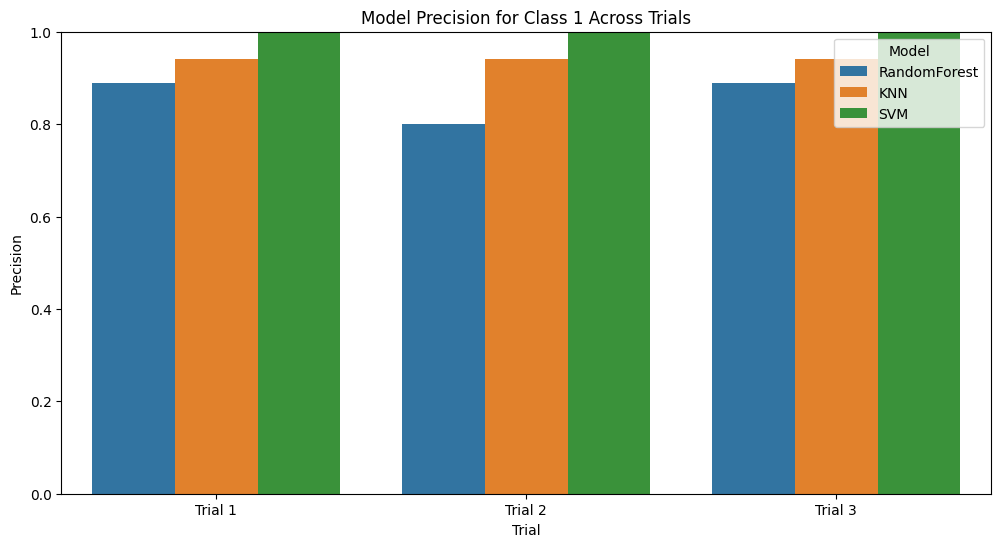

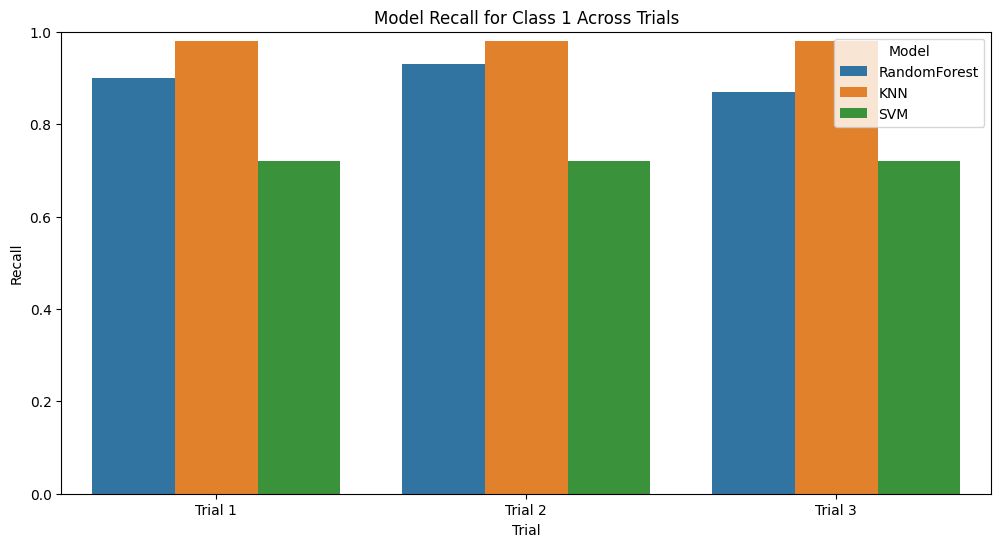

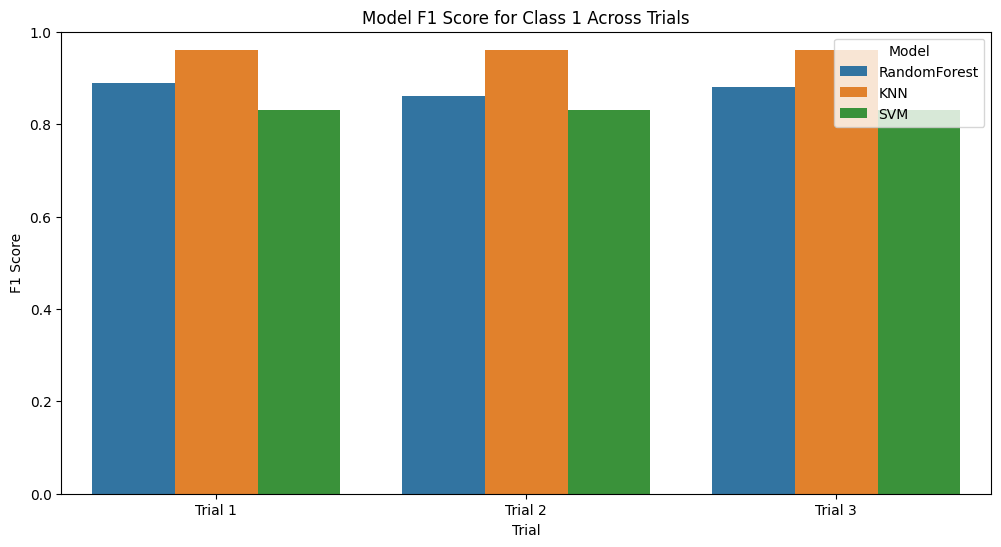

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Organize your actual results into a DataFrame
data = {
    'Model': [
        'RandomForest', 'RandomForest', 'RandomForest', 
        'KNN', 'KNN', 'KNN', 
        'SVM', 'SVM', 'SVM'
    ],
    'Trial': [
        'Trial 1', 'Trial 2', 'Trial 3',
        'Trial 1', 'Trial 2', 'Trial 3',
        'Trial 1', 'Trial 2', 'Trial 3'
    ],
    'Accuracy': [
        0.9721, 0.9613, 0.9700, 
        0.9892, 0.9892, 0.9892, 
        0.9636, 0.9636, 0.9636
    ],
    'Precision_1': [
        0.89, 0.80, 0.89, 
        0.94, 0.94, 0.94, 
        1.00, 1.00, 1.00
    ],
    'Recall_1': [
        0.90, 0.93, 0.87, 
        0.98, 0.98, 0.98, 
        0.72, 0.72, 0.72
    ],
    'F1_Score_1': [
        0.89, 0.86, 0.88, 
        0.96, 0.96, 0.96, 
        0.83, 0.83, 0.83
    ]
}

df = pd.DataFrame(data)

# Plotting Accuracy
plt.figure(figsize=(12, 6))
sns.barplot(x='Trial', y='Accuracy', hue='Model', data=df)
plt.title('Model Accuracy Across Trials')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.show()

# Plotting Precision for class 1
plt.figure(figsize=(12, 6))
sns.barplot(x='Trial', y='Precision_1', hue='Model', data=df)
plt.title('Model Precision for Class 1 Across Trials')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

# Plotting Recall for class 1
plt.figure(figsize=(12, 6))
sns.barplot(x='Trial', y='Recall_1', hue='Model', data=df)
plt.title('Model Recall for Class 1 Across Trials')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

# Plotting F1 Score for class 1
plt.figure(figsize=(12, 6))
sns.barplot(x='Trial', y='F1_Score_1', hue='Model', data=df)
plt.title('Model F1 Score for Class 1 Across Trials')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.show()


##############################################################################################################################################

Code with Time analysis

Trial 1


RandomForest - Trial 1: Node 3 + All Types
Accuracy: 0.9721
Confusion Matrix:
[[3255   56]
 [  50  435]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3311
           1       0.89      0.90      0.89       485

    accuracy                           0.97      3796
   macro avg       0.94      0.94      0.94      3796
weighted avg       0.97      0.97      0.97      3796

Training Time: 0.0289 seconds
Testing Time: 0.0020 seconds

RandomForest - Trial 2: Node 3 + All Types
Accuracy: 0.9613
Confusion Matrix:
[[3200  111]
 [  36  449]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3311
           1       0.80      0.93      0.86       485

    accuracy                           0.96      3796
   macro avg       0.90      0.95      0.92      3796
weighted avg       0.96      0.96      0.96      3796

Training Time: 0.0250 seconds

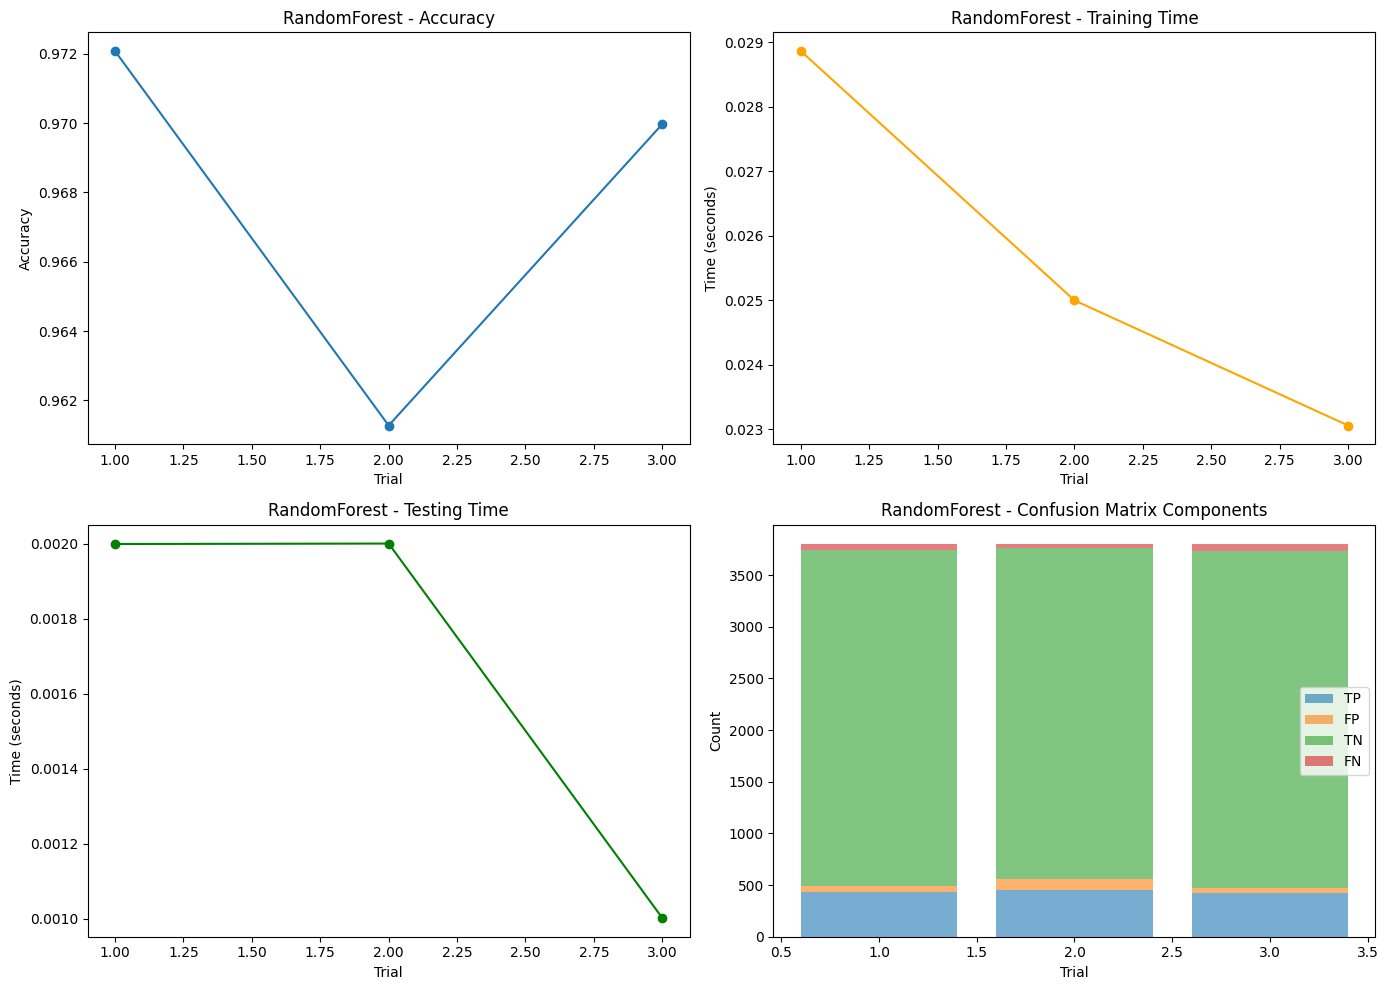

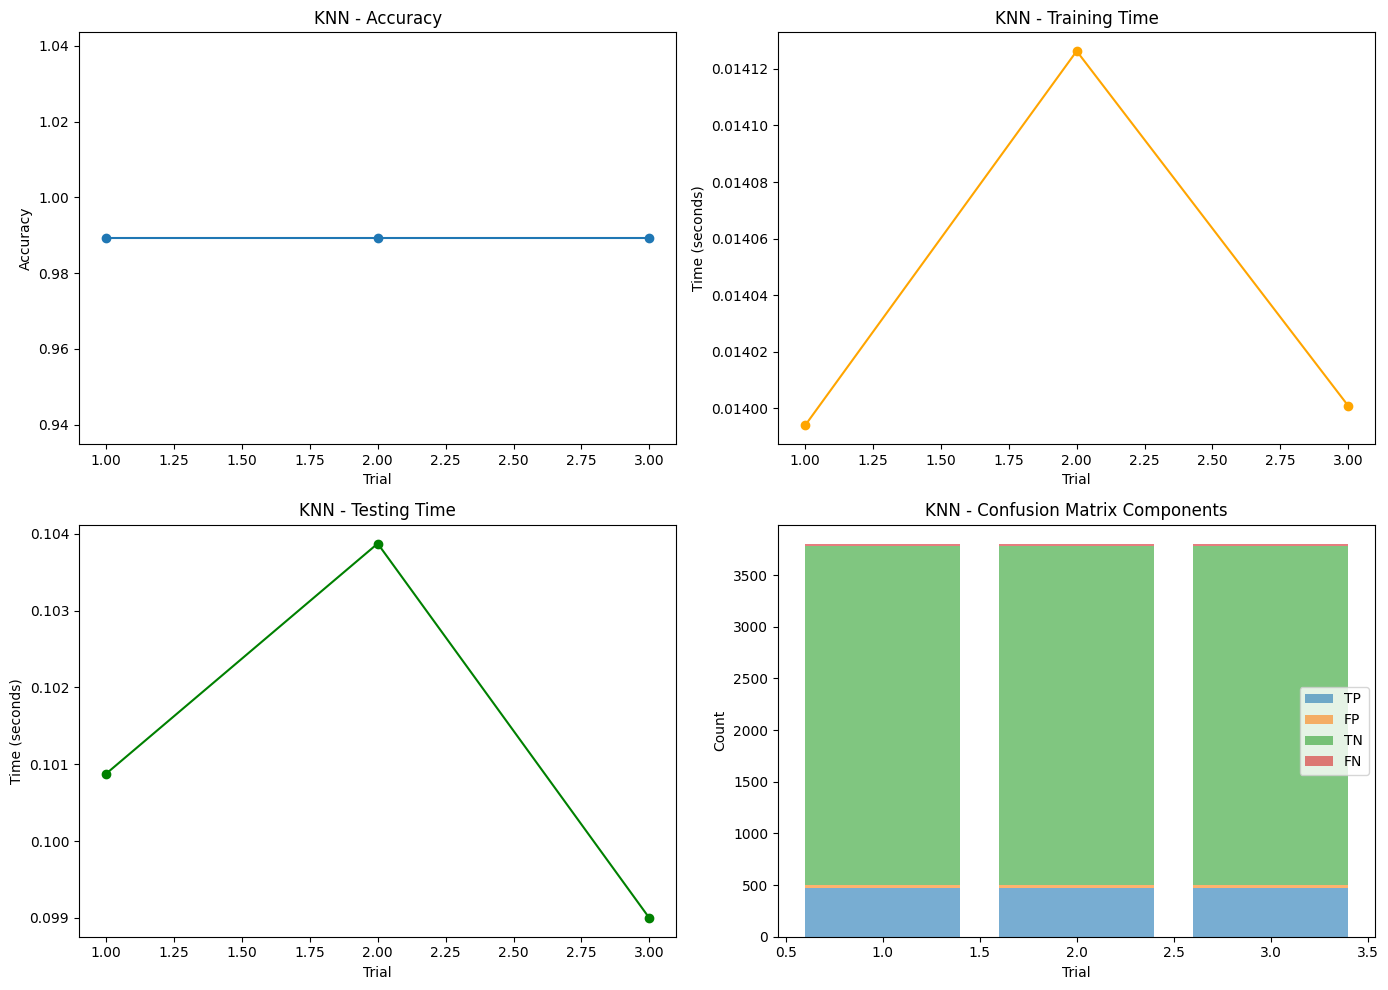

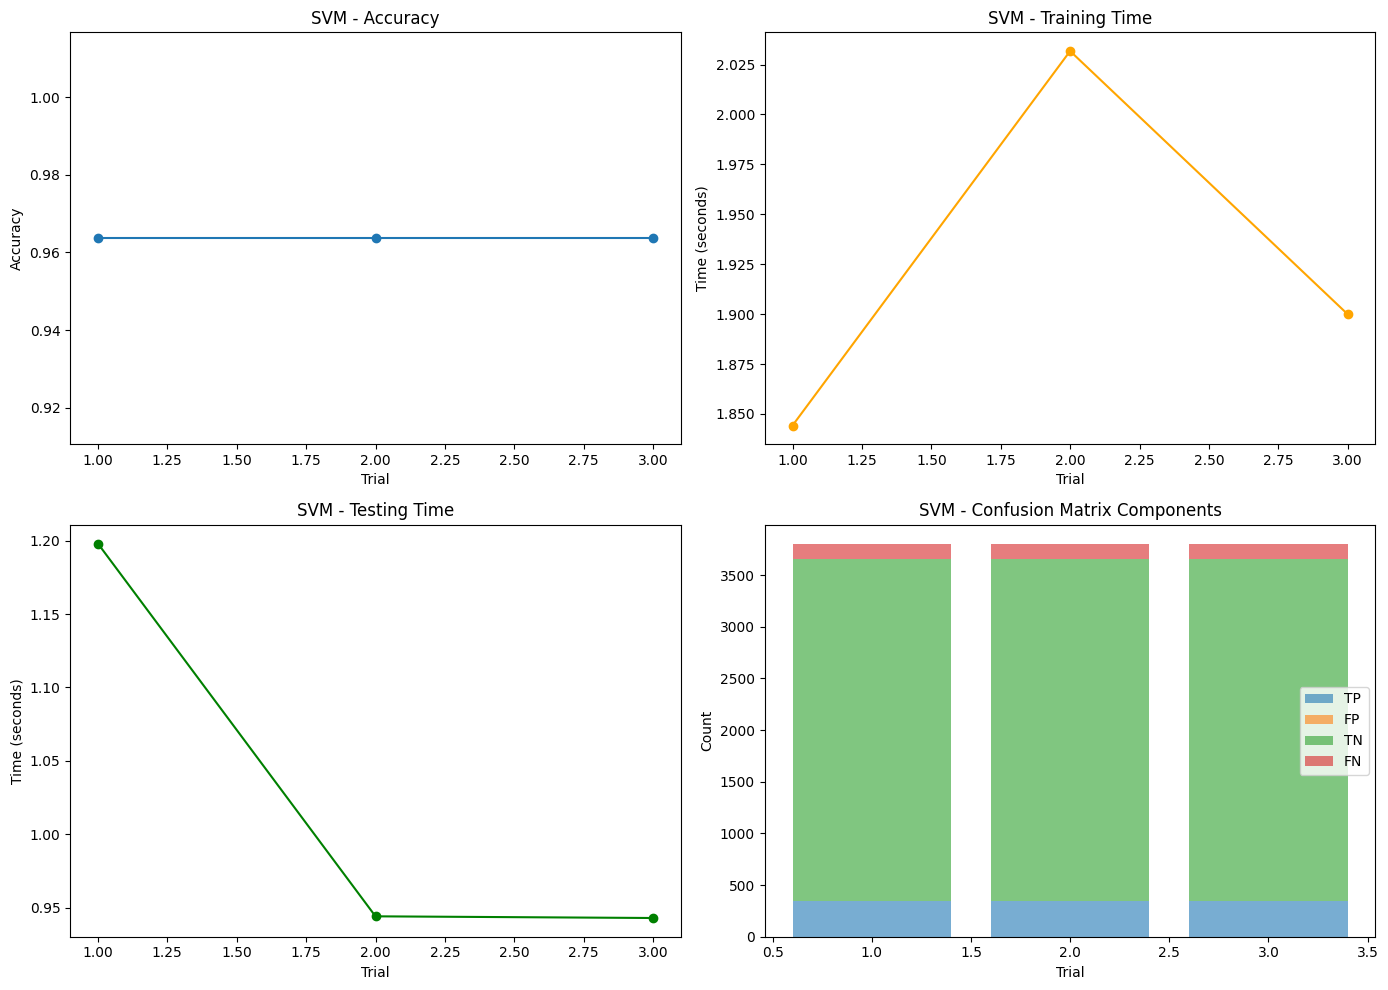

In [16]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')  # Update with your dataset path

# Encode categorical features (if any)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['PacketRaw'])  # Drop 'PacketRaw' from features
y = df['PacketRaw']

# Apply condition to categorize PacketRaw
y = y.apply(lambda x: 0 if x < 100 else 1)  # 0: Normal, 1: Attack

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manually selecting features
selected_features = ['Type', 'Node', 'FaceId', 'FaceDescr', 'Kilobytes', 'KilobytesRaw']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Function to evaluate models and track time
def evaluate_model_with_time(clf, X_train, y_train, X_test, y_test, trial_name, clf_name):
    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    
    start_test_time = time.time()
    y_pred = clf.predict(X_test)
    end_test_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    train_time = end_train_time - start_train_time
    test_time = end_test_time - start_test_time

    print(f"\n{clf_name} - {trial_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Testing Time: {test_time:.4f} seconds")

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    return accuracy, cm, report, train_time, test_time, TP, TN, FP, FN

# Initialize lists to collect results
results = {
    'RandomForest': [],
    'KNN': [],
    'SVM': []
}

# RandomForest Trials
for trial in range(1, 4):
    acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
        RandomForestClassifier(max_depth=5, n_estimators=10, random_state=trial),
        X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Types", "RandomForest"
    )
    results['RandomForest'].append({
        'trial': trial, 'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'train_time': train_time, 'test_time': test_time
    })

# KNN Trials
for trial in range(1, 4):
    acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
        KNeighborsClassifier(),
        X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Types", "KNN"
    )
    results['KNN'].append({
        'trial': trial, 'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'train_time': train_time, 'test_time': test_time
    })

# SVM Trials
for trial in range(1, 4):
    acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
        SVC(random_state=trial),
        X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Types", "SVM"
    )
    results['SVM'].append({
        'trial': trial, 'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
        'train_time': train_time, 'test_time': test_time
    })

# Plot the results
def plot_results(results, classifier_name):
    trials = [res['trial'] for res in results[classifier_name]]
    accuracies = [res['accuracy'] for res in results[classifier_name]]
    train_times = [res['train_time'] for res in results[classifier_name]]
    test_times = [res['test_time'] for res in results[classifier_name]]
    TPs = [res['TP'] for res in results[classifier_name]]
    TNs = [res['TN'] for res in results[classifier_name]]
    FPs = [res['FP'] for res in results[classifier_name]]
    FNs = [res['FN'] for res in results[classifier_name]]

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    axs[0, 0].plot(trials, accuracies, marker='o')
    axs[0, 0].set_title(f'{classifier_name} - Accuracy')
    axs[0, 0].set_xlabel('Trial')
    axs[0, 0].set_ylabel('Accuracy')
    
    axs[0, 1].plot(trials, train_times, marker='o', color='orange')
    axs[0, 1].set_title(f'{classifier_name} - Training Time')
    axs[0, 1].set_xlabel('Trial')
    axs[0, 1].set_ylabel('Time (seconds)')
    
    axs[1, 0].plot(trials, test_times, marker='o', color='green')
    axs[1, 0].set_title(f'{classifier_name} - Testing Time')
    axs[1, 0].set_xlabel('Trial')
    axs[1, 0].set_ylabel('Time (seconds)')
    
    axs[1, 1].bar(trials, TPs, label='TP', alpha=0.6)
    axs[1, 1].bar(trials, FPs, bottom=TPs, label='FP', alpha=0.6)
    axs[1, 1].bar(trials, TNs, bottom=[i+j for i,j in zip(TPs,FPs)], label='TN', alpha=0.6)
    axs[1, 1].bar(trials, FNs, bottom=[i+j+k for i,j,k in zip(TPs,FPs,TNs)], label='FN', alpha=0.6)
    axs[1, 1].set_title(f'{classifier_name} - Confusion Matrix Components')
    axs[1, 1].set_xlabel('Trial')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Plot for RandomForest
plot_results(results, 'RandomForest')

# Plot for KNN
plot_results(results, 'KNN')

# Plot for SVM
plot_results(results, 'SVM')


Trial 2


RandomForest - Trial 2: Node 3 + Type 'InInterests'
Accuracy: 0.9721
Confusion Matrix:
[[3259   52]
 [  54  431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3311
           1       0.89      0.89      0.89       485

    accuracy                           0.97      3796
   macro avg       0.94      0.94      0.94      3796
weighted avg       0.97      0.97      0.97      3796

Training Time: 0.0201 seconds
Testing Time: 0.0020 seconds

SVM - Trial 2: Node 3 + Type 'InInterests'
Accuracy: 0.9636
Confusion Matrix:
[[3311    0]
 [ 138  347]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3311
           1       1.00      0.72      0.83       485

    accuracy                           0.96      3796
   macro avg       0.98      0.86      0.91      3796
weighted avg       0.97      0.96      0.96      3796

Training Time: 1.378

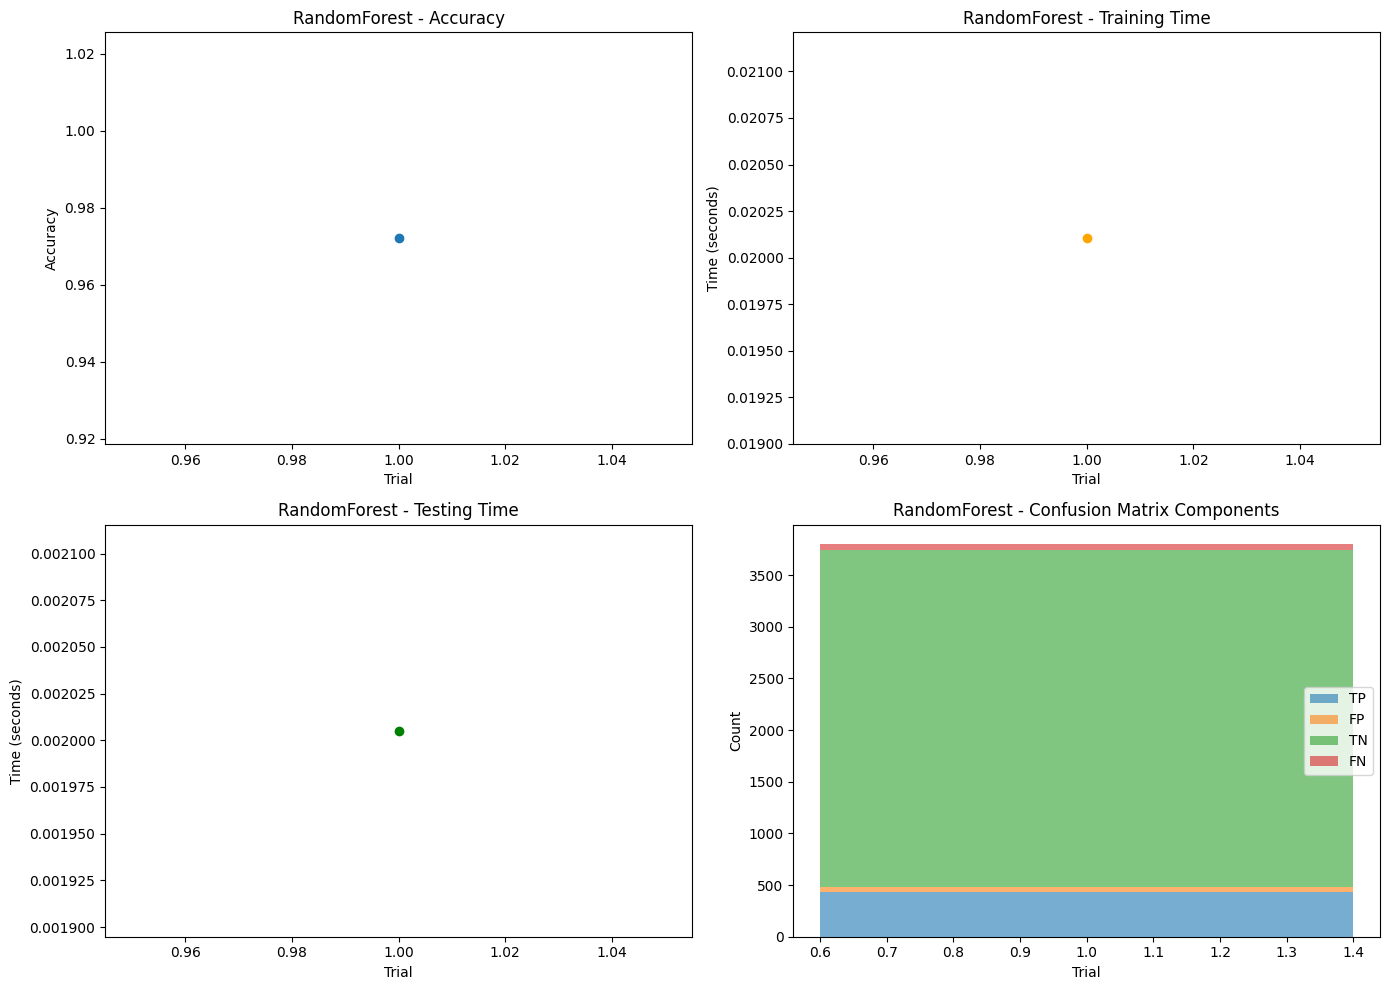

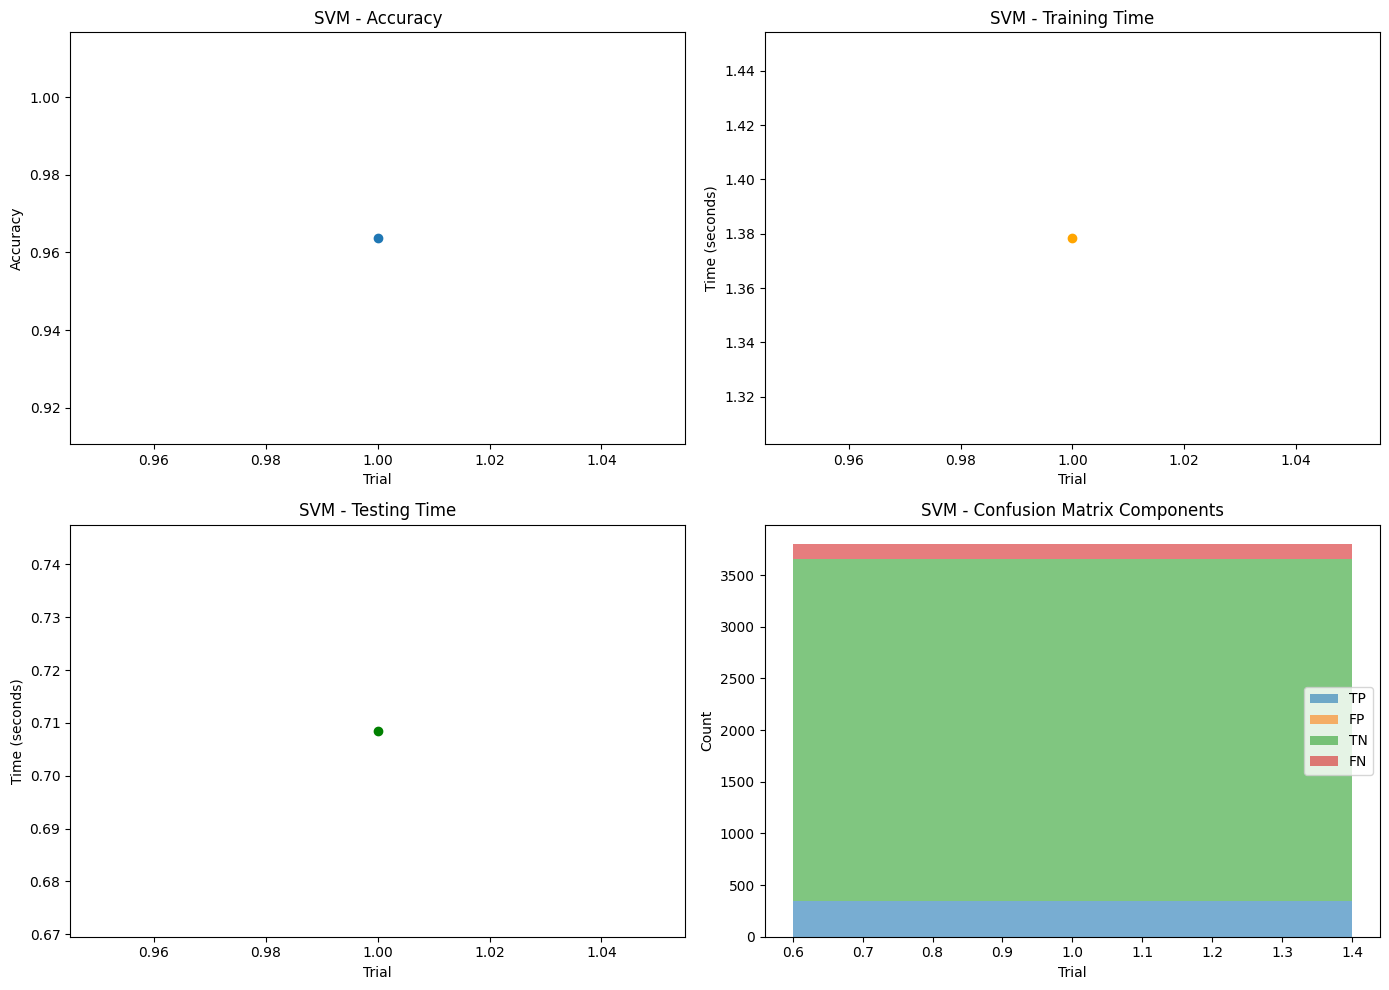

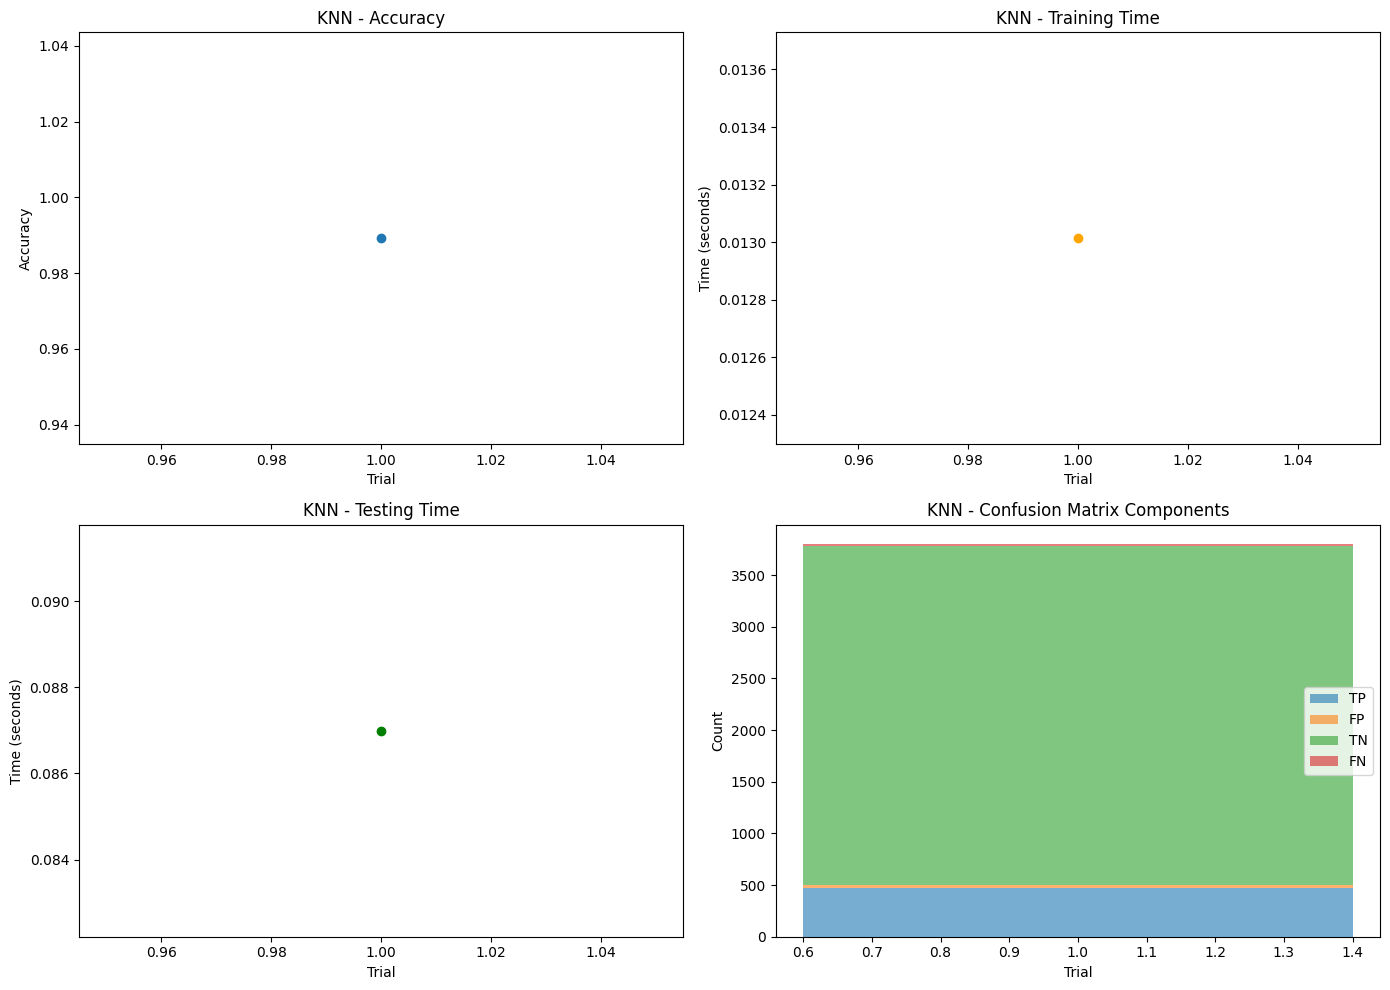

In [3]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')  # Update with your dataset path

# Encode categorical features (if any)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop(columns=['PacketRaw'])  # Drop 'PacketRaw' from features
y = df['PacketRaw']

# Apply condition to categorize PacketRaw
y = y.apply(lambda x: 0 if x < 100 else 1)  # 0: Normal, 1: Attack

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manually selecting features
selected_features = ['Type', 'Node', 'FaceId', 'FaceDescr', 'Kilobytes', 'KilobytesRaw']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Function to evaluate models and track time
def evaluate_model_with_time(clf, X_train, y_train, X_test, y_test, trial_name, clf_name):
    start_train_time = time.time()
    clf.fit(X_train, y_train)
    end_train_time = time.time()
    
    start_test_time = time.time()
    y_pred = clf.predict(X_test)
    end_test_time = time.time()
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    train_time = end_train_time - start_train_time
    test_time = end_test_time - start_test_time

    print(f"\n{clf_name} - {trial_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Testing Time: {test_time:.4f} seconds")

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    return accuracy, cm, report, train_time, test_time, TP, TN, FP, FN

# Initialize lists to collect results
results = {
    'RandomForest': [],
    'SVM': [],
    'KNN': []
}

# RandomForest Trials
acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
    RandomForestClassifier(max_depth=5, n_estimators=10, random_state=42),
    X_train_resampled, y_train_resampled, X_test_selected, y_test,
    "Trial 2: Node 3 + Type 'InInterests'", "RandomForest"
)
results['RandomForest'].append({
    'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
    'train_time': train_time, 'test_time': test_time
})

# SVM Trials
acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
    SVC(random_state=42),
    X_train_resampled, y_train_resampled, X_test_selected, y_test,
    "Trial 2: Node 3 + Type 'InInterests'", "SVM"
)
results['SVM'].append({
    'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
    'train_time': train_time, 'test_time': test_time
})

# KNN Trials
acc, cm, report, train_time, test_time, TP, TN, FP, FN = evaluate_model_with_time(
    KNeighborsClassifier(n_neighbors=5),
    X_train_resampled, y_train_resampled, X_test_selected, y_test,
    "Trial 2: Node 3 + Type 'InInterests'", "KNN"
)
results['KNN'].append({
    'accuracy': acc, 'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN,
    'train_time': train_time, 'test_time': test_time
})

# Plot the results
def plot_results(results, classifier_name):
    accuracies = [res['accuracy'] for res in results[classifier_name]]
    train_times = [res['train_time'] for res in results[classifier_name]]
    test_times = [res['test_time'] for res in results[classifier_name]]
    TPs = [res['TP'] for res in results[classifier_name]]
    TNs = [res['TN'] for res in results[classifier_name]]
    FPs = [res['FP'] for res in results[classifier_name]]
    FNs = [res['FN'] for res in results[classifier_name]]

    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    axs[0, 0].plot([1], accuracies, marker='o')
    axs[0, 0].set_title(f'{classifier_name} - Accuracy')
    axs[0, 0].set_xlabel('Trial')
    axs[0, 0].set_ylabel('Accuracy')
    
    axs[0, 1].plot([1], train_times, marker='o', color='orange')
    axs[0, 1].set_title(f'{classifier_name} - Training Time')
    axs[0, 1].set_xlabel('Trial')
    axs[0, 1].set_ylabel('Time (seconds)')
    
    axs[1, 0].plot([1], test_times, marker='o', color='green')
    axs[1, 0].set_title(f'{classifier_name} - Testing Time')
    axs[1, 0].set_xlabel('Trial')
    axs[1, 0].set_ylabel('Time (seconds)')
    
    axs[1, 1].bar([1], TPs, label='TP', alpha=0.6)
    axs[1, 1].bar([1], FPs, bottom=TPs, label='FP', alpha=0.6)
    axs[1, 1].bar([1], TNs, bottom=[i+j for i,j in zip(TPs,FPs)], label='TN', alpha=0.6)
    axs[1, 1].bar([1], FNs, bottom=[i+j+k for i,j,k in zip(TPs,FPs,TNs)], label='FN', alpha=0.6)
    axs[1, 1].set_title(f'{classifier_name} - Confusion Matrix Components')
    axs[1, 1].set_xlabel('Trial')
    axs[1, 1].set_ylabel('Count')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Plot for RandomForest
plot_results(results, 'RandomForest')

# Plot for SVM
plot_results(results, 'SVM')

# Plot for KNN
plot_results(results, 'KNN')


Trial 3


RandomForest - Trial 1: Node 3 + All Relevant Types
Training Time: 0.0200 seconds
Testing Time: 0.0010 seconds
Accuracy: 0.9273
Confusion Matrix:
[[1878  184]
 [   0  470]]
TP: 470, FP: 184, TN: 1878, FN: 0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2062
           1       0.72      1.00      0.84       470

    accuracy                           0.93      2532
   macro avg       0.86      0.96      0.89      2532
weighted avg       0.95      0.93      0.93      2532



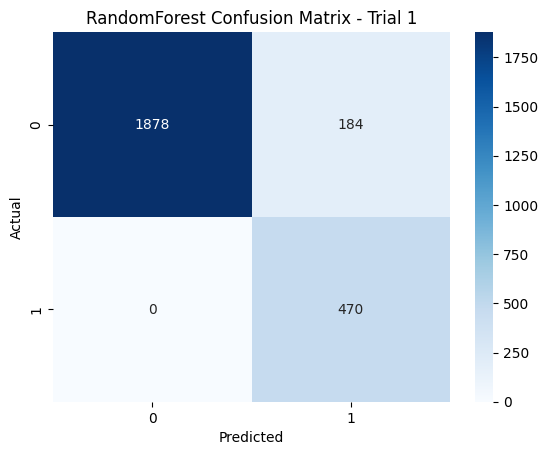


RandomForest - Trial 2: Node 3 + All Relevant Types
Training Time: 0.0200 seconds
Testing Time: 0.0020 seconds
Accuracy: 0.9439
Confusion Matrix:
[[1942  120]
 [  22  448]]
TP: 448, FP: 120, TN: 1942, FN: 22
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      2062
           1       0.79      0.95      0.86       470

    accuracy                           0.94      2532
   macro avg       0.89      0.95      0.91      2532
weighted avg       0.95      0.94      0.95      2532



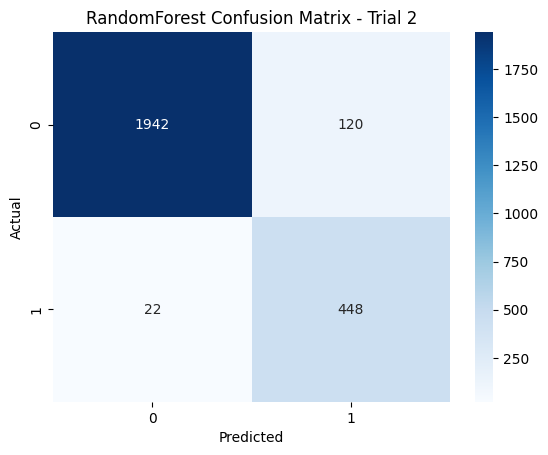


KNN - Trial 1: Node 3 + All Relevant Types
Training Time: 0.0130 seconds
Testing Time: 0.0680 seconds
Accuracy: 0.9964
Confusion Matrix:
[[2053    9]
 [   0  470]]
TP: 470, FP: 9, TN: 2053, FN: 0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2062
           1       0.98      1.00      0.99       470

    accuracy                           1.00      2532
   macro avg       0.99      1.00      0.99      2532
weighted avg       1.00      1.00      1.00      2532



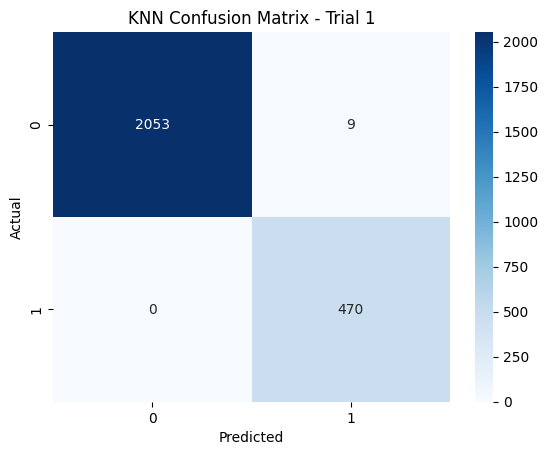


KNN - Trial 2: Node 3 + All Relevant Types
Training Time: 0.0120 seconds
Testing Time: 0.0750 seconds
Accuracy: 0.9964
Confusion Matrix:
[[2053    9]
 [   0  470]]
TP: 470, FP: 9, TN: 2053, FN: 0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2062
           1       0.98      1.00      0.99       470

    accuracy                           1.00      2532
   macro avg       0.99      1.00      0.99      2532
weighted avg       1.00      1.00      1.00      2532



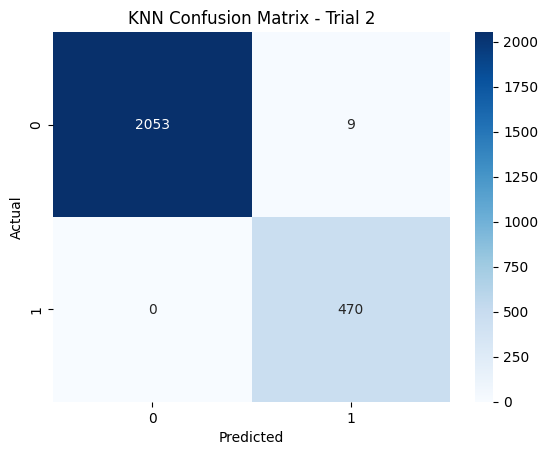


SVM - Trial 1: Node 3 + All Relevant Types
Training Time: 0.5310 seconds
Testing Time: 0.3120 seconds
Accuracy: 0.9605
Confusion Matrix:
[[2062    0]
 [ 100  370]]
TP: 370, FP: 0, TN: 2062, FN: 100
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2062
           1       1.00      0.79      0.88       470

    accuracy                           0.96      2532
   macro avg       0.98      0.89      0.93      2532
weighted avg       0.96      0.96      0.96      2532



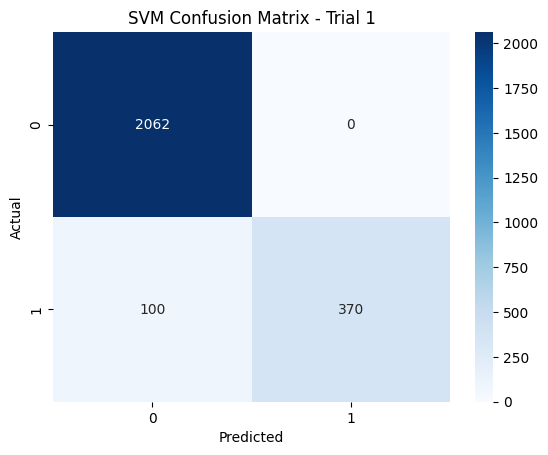


SVM - Trial 2: Node 3 + All Relevant Types
Training Time: 0.5672 seconds
Testing Time: 0.4040 seconds
Accuracy: 0.9605
Confusion Matrix:
[[2062    0]
 [ 100  370]]
TP: 370, FP: 0, TN: 2062, FN: 100
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2062
           1       1.00      0.79      0.88       470

    accuracy                           0.96      2532
   macro avg       0.98      0.89      0.93      2532
weighted avg       0.96      0.96      0.96      2532



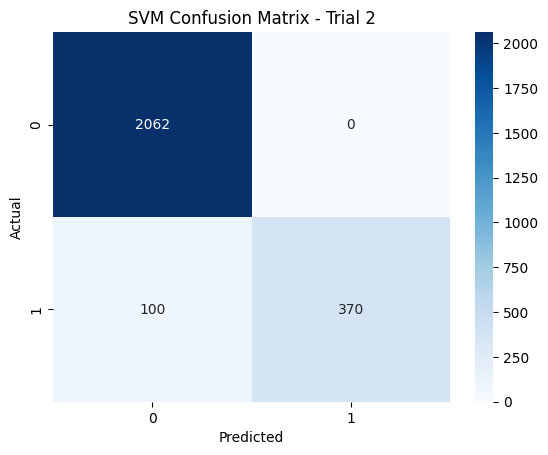

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import time
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('extended_augmented_dataset.csv')  # Update with your dataset path

# Encode categorical features (if any)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Map the original type labels to their encoded values
original_types = ['InInterests', 'OutInterests', 'InData', 'OutData', 'InSatisfiedInterests', 'OutSatisfiedInterests']
trial_3_types = label_encoders['Type'].transform(original_types)

# Separate features and target
X = df.drop(columns=['PacketRaw'])  # Drop 'PacketRaw' from features
y = df['PacketRaw']

# Apply condition to categorize PacketRaw
y = y.apply(lambda x: 0 if x < 100 else 1)  # 0: Normal, 1: Attack

# Filter for Trial 3 specific types
X = X[X['Type'].isin(trial_3_types)]
y = y[X.index]  # Align y with the filtered X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Manually selecting features
selected_features = ['Type', 'Node', 'FaceId', 'FaceDescr', 'Kilobytes', 'KilobytesRaw']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Function to evaluate models and track times
def evaluate_model(clf, X_train, y_train, X_test, y_test, trial_name, clf_name):
    # Training
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train

    # Testing
    start_test = time.time()
    y_pred = clf.predict(X_test)
    end_test = time.time()
    testing_time = end_test - start_test

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    tn, fp, fn, tp = cm.ravel()

    print(f"\n{clf_name} - {trial_name}")
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Testing Time: {testing_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")
    print("Classification Report:")
    print(report)

    return accuracy, cm, report, training_time, testing_time, tn, fp, fn, tp

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# RandomForest Trials
for trial in range(1, 3):
    rf_clf = RandomForestClassifier(max_depth=5, n_estimators=10, random_state=trial)
    accuracy, cm, report, training_time, testing_time, tn, fp, fn, tp = evaluate_model(
        rf_clf, X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Relevant Types", "RandomForest")
    plot_confusion_matrix(cm, f"RandomForest Confusion Matrix - Trial {trial}")

# KNN Trials
for trial in range(1, 3):
    knn_clf = KNeighborsClassifier()
    accuracy, cm, report, training_time, testing_time, tn, fp, fn, tp = evaluate_model(
        knn_clf, X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Relevant Types", "KNN")
    plot_confusion_matrix(cm, f"KNN Confusion Matrix - Trial {trial}")

# SVM Trials
for trial in range(1, 3):
    svm_clf = SVC(random_state=trial)
    accuracy, cm, report, training_time, testing_time, tn, fp, fn, tp = evaluate_model(
        svm_clf, X_train_resampled, y_train_resampled, X_test_selected, y_test,
        f"Trial {trial}: Node 3 + All Relevant Types", "SVM")
    plot_confusion_matrix(cm, f"SVM Confusion Matrix - Trial {trial}")


###############################################################################################################################################